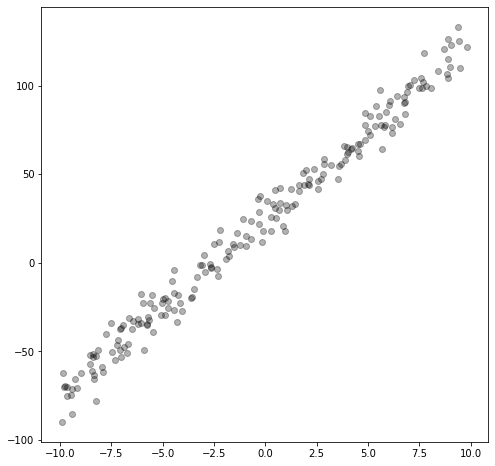

In [8]:
import numpy as np
import matplotlib.pyplot as plt

path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

m=x_data.size

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, c='black', alpha=0.3)
plt.show()


In [9]:

def objective_function(y, hx, m):
    loss =  hx - y
    tmp = np.sum(loss)
    sqr = tmp*tmp 
    return sqr/(2*m)

def loss_function_theta_zero(y, hx, m):
    loss = hx - y
    tmp = np.sum(loss)
    return tmp/m


    
def loss_function_theta_one(y,hx, x, m):
    loss = (hx - y)*x
    tmp = np.sum(loss)
    return tmp/m
    

In [10]:
threshold = 5

#initial condition
theta0 = 0
theta1 = 0
hx = x_data*theta1 + theta0
#step_size 
step = 0.001
loss_list = []
loss_count = []
theta0_list = []
theta1_list = []
enough = False
count = 0 
while(enough == False):
    loss = objective_function(y_data, hx, m)
    loss_list.append(loss)
    loss_count.append(count)
    theta0_list.append(theta0)
    theta1_list.append(theta1)
    if(loss < threshold ):
        enough = True
    else:
        count = count + 1
        theta0 = theta0 - step*loss_function_theta_zero(y_data, hx, m)
        theta1 = theta1 - step*loss_function_theta_one(y_data, hx, x_data, m)
        hx = x_data*theta1 + theta0
        
print(theta0, theta1)

24.68217318812857 9.931167487582362


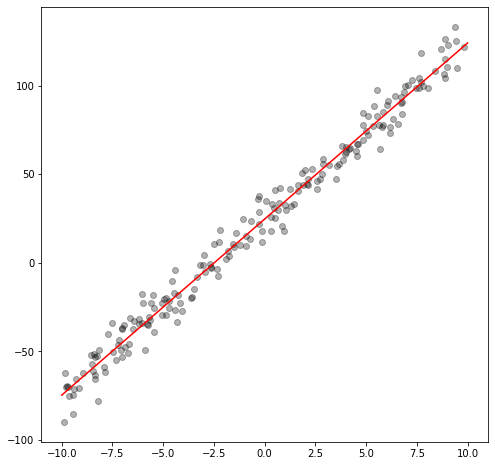

In [12]:
plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, c='black', alpha=0.3)
plt.plot([-10,10],[theta0-theta1*10, theta1*10+theta0], c='r')
plt.show()